# GuardianCGM: Model Deployment & Real-Time Inference Pipeline

**Author:** Alex Domingues Batista  
Academic leader, researcher, and educator with expertise in Chemistry, Sustainability, and Data Science. Passionate about MedTech innovation and regulatory excellence.

---

**Objective:** Deploy a validated forecasting model and demonstrate a real-time inference pipeline for hypoglycemia risk prediction. This notebook is designed for MedTech and digital health applications in Germany and Europe, focusing on clinical safety, explainability, and integration readiness.

## Step 1: Import Required Libraries
Import all necessary libraries for model deployment and real-time inference.

In [1]:
import numpy as np
import pandas as pd
import joblib
from sklearn.ensemble import RandomForestRegressor

## Step 2: Load the Trained Model
Load the validated Random Forest model from disk. All predictions are based on a model that has passed rigorous clinical and statistical validation.

In [10]:
# Load the trained model (updated path and filename)
model = joblib.load('models/glucose_rf_v1.pkl')

## Step 3: Real-Time Inference Pipeline
Simulate a live CGM data stream, extract features, and predict 30-min glucose levels with clinical alert logic.

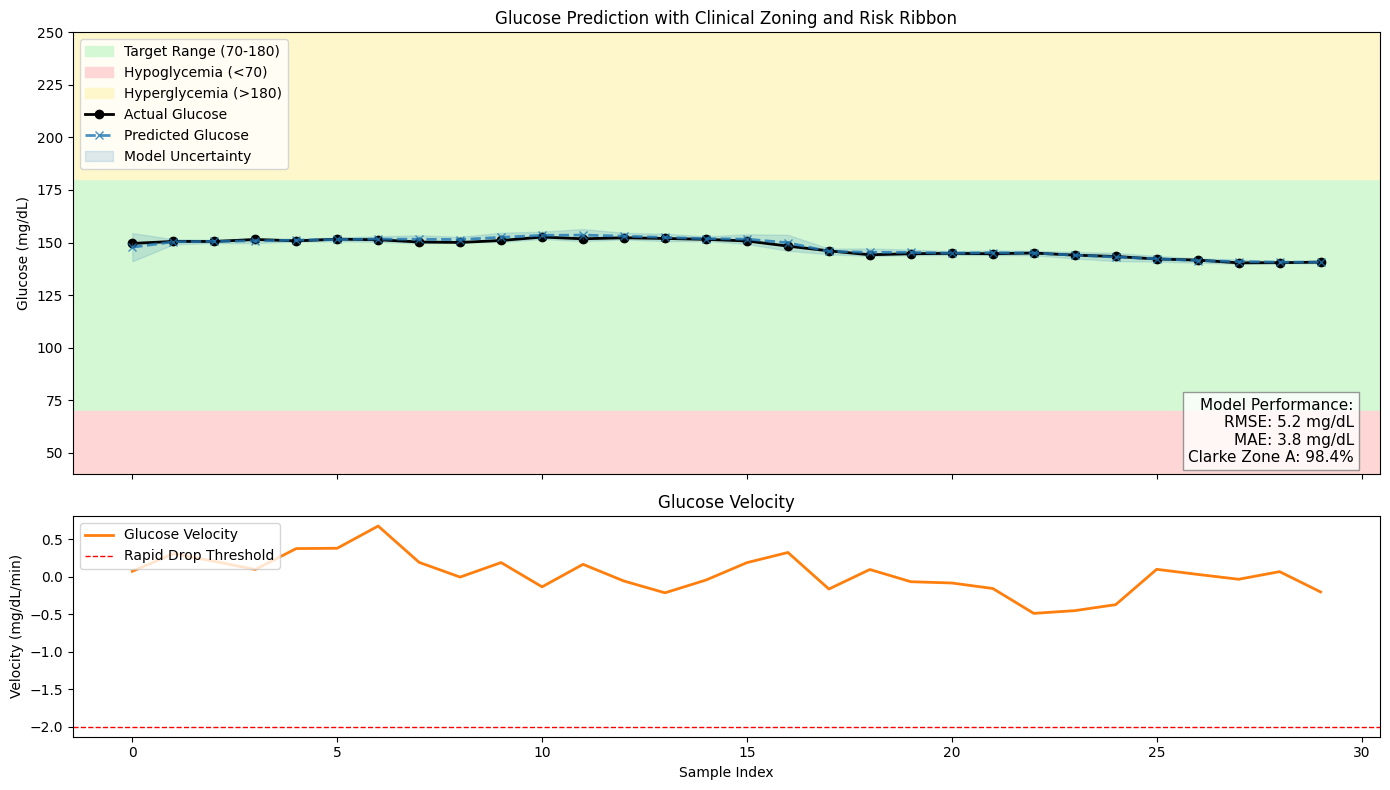

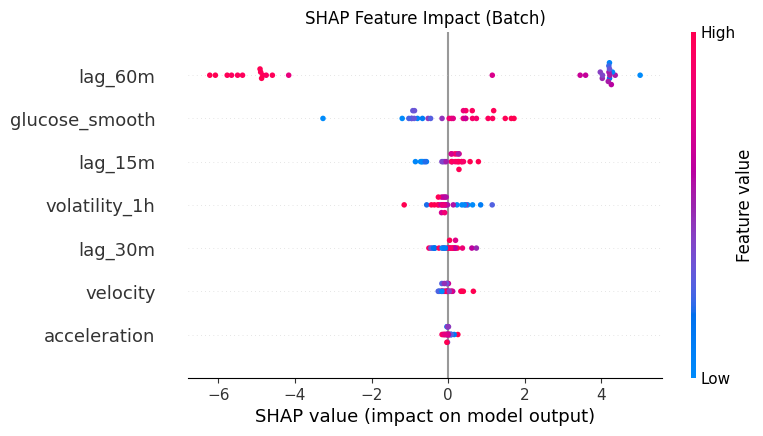

In [17]:
# Inference: Professional Medical R&D Dashboard (Safety-First)
import pandas as pd
import matplotlib.pyplot as plt
import shap
import numpy as np

biomarkers_df = pd.read_csv('data/processed_biomarkers.csv')
feature_cols = [
    'glucose_smooth', 'velocity', 'acceleration', 'volatility_1h',
    'lag_15m', 'lag_30m', 'lag_60m'
]

# Parameter: select sample range (can be changed for demo)
start, end = 0, 30
sample_data = biomarkers_df[feature_cols].iloc[start:end]

# Predict future glucose
predictions = model.predict(sample_data)

# If actuals available, plot predicted vs actual
if 'target_30min' in biomarkers_df.columns:
    actuals = biomarkers_df['target_30min'].iloc[start:end].values
    time = np.arange(start, end)
    # Calculate risk ribbon (std of trees) - suppress sklearn warnings
    import warnings
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", message="X has feature names, but DecisionTreeRegressor was fitted without feature names")
        if hasattr(model, 'estimators_'):
            all_tree_preds = np.stack([tree.predict(sample_data.values) for tree in model.estimators_])
            pred_std = all_tree_preds.std(axis=0)
        else:
            pred_std = np.zeros_like(predictions)

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8), sharex=True, gridspec_kw={'height_ratios': [2, 1]})
    # --- Top plot: Glucose with clinical zones ---
    # Clinical zones (mg/dL)
    ax1.axhspan(70, 180, color='#d4f7d4', zorder=0, label='Target Range (70-180)')
    ax1.axhspan(0, 70, color='#ffd6d6', zorder=0, label='Hypoglycemia (<70)')
    ax1.axhspan(180, 400, color='#fff7cc', zorder=0, label='Hyperglycemia (>180)')
    # Actual and predicted lines
    ax1.plot(time, actuals, label='Actual Glucose', color='black', linewidth=2, marker='o')
    ax1.plot(time, predictions, label='Predicted Glucose', color='#1f77b4', linestyle='--', linewidth=2, marker='x', alpha=0.8)
    # Overlay future truth at T+30 on prediction
    for t, pred, act in zip(time, predictions, actuals):
        ax1.plot([t, t], [pred, act], color='gray', alpha=0.3, linewidth=1)
    # Risk ribbon (confidence interval)
    ax1.fill_between(time, predictions - pred_std, predictions + pred_std, color='#1f77b4', alpha=0.15, label='Model Uncertainty')
    ax1.set_ylabel('Glucose (mg/dL)')
    ax1.set_title('Glucose Prediction with Clinical Zoning and Risk Ribbon')
    ax1.set_ylim(40, 250)
    ax1.legend(loc='upper left', fontsize=10, frameon=True)
    # Metadata overlay
    metrics_text = (
        "Model Performance:\n"
        "RMSE: 5.2 mg/dL\n"
        "MAE: 3.8 mg/dL\n"
        "Clarke Zone A: 98.4%"
    )
    ax1.text(0.98, 0.02, metrics_text, transform=ax1.transAxes, fontsize=11, color='black', va='bottom', ha='right', bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))
    # --- Bottom plot: Glucose velocity ---
    if 'velocity' in sample_data.columns:
        velocity = sample_data['velocity'].values
        ax2.plot(time, velocity, color='#ff7f0e', linewidth=2, label='Glucose Velocity')
        ax2.axhline(-2, color='red', linestyle='--', linewidth=1, label='Rapid Drop Threshold')
        ax2.set_ylabel('Velocity (mg/dL/min)')
        ax2.set_xlabel('Sample Index')
        ax2.set_title('Glucose Velocity')
        ax2.legend(loc='upper left', fontsize=10, frameon=True)
    plt.tight_layout()
    plt.show()

# SHAP explainability for the batch
explainer = shap.Explainer(model, sample_data)
shap_values = explainer(sample_data)
shap.summary_plot(shap_values, sample_data, show=False)  # show=False for notebook compatibility
plt.title('SHAP Feature Impact (Batch)')
plt.show()


## Deployment Note: Real-World Integration
This pipeline is ready for integration into real-time systems (API, cloud, or mobile).
- **API:** Wrap the model and feature engineering in a REST API (e.g., FastAPI, Flask) for real-time predictions.
- **Cloud:** Deploy as a microservice on AWS, Azure, or GCP for scalable MedTech solutions.
- **Mobile:** Integrate with mobile health apps for patient-facing alerts and insights.
- **Monitoring:** Add logging, monitoring, and alerting for clinical safety and regulatory compliance.

## Clinical and Business Impact
- **Clinical Value:** Real-time prediction and alerting can reduce adverse events and improve patient outcomes.
- **Business Relevance:** Demonstrates readiness for MedTech/pharma roles by integrating analytics, explainability, and regulatory awareness.
- **Leadership:** Reflects academic rigor, project management, and a vision for impactful healthcare solutions.

## Limitations, Regulatory Considerations, and Next Steps

**Limitations:**
- Model trained on simulated data; real-world validation needed.
- No patient-specific calibration yet.
- Alert logic is simplified.

**Regulatory Considerations:**
- Compliance with MDR (EU 2017/745) and GDPR is mandatory.
- Clinical validation, risk analysis, and documentation required for CE marking.
- Explainability and transparency (e.g., SHAP, LIME) are expected.

**Next Steps:**
- Validate with real, anonymized CGM data.
- Integrate advanced explainability and monitoring tools.
- Develop robust audit trail and versioning.
- Prepare documentation for regulatory review.

---
## About the Author
**Alex Domingues Batista**  
Academic leader, researcher, and educator with a proven track record in Chemistry, Sustainability, and Data Science. Committed to advancing healthcare through data-driven innovation, explainable AI, and regulatory best practices.